#### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image 

from sklearn.preprocessing import MinMaxScaler

#### 1.1 Importing and reading the data 

In [13]:
data = np.genfromtxt("batch_1_10000.csv", delimiter=',')

In [14]:
data.shape

(10000, 10000)

In [15]:
data[0]

array([ 245.,  245.,  245., ...,  245.,  245.,  245.])

In [16]:
np.amax(data)

255.0

In [17]:
np.amin(data)

0.0

In [18]:
type(data[1][1])

numpy.float64

#### 1.2 Visualize the data 

<function matplotlib.pyplot.show>

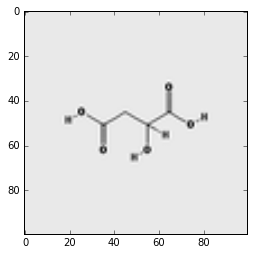

In [27]:
image1 = data[0]
image1 = image1.reshape(100,100)
plt.imshow(image1, cmap='gray')
plt.show

#### 1.3 Apply transformation

In [20]:
# Transform

def Scaletoarray(arr):
    minmax = MinMaxScaler(feature_range=(0,1))
    for i in range(len(arr)):
        temp_array = arr[i].reshape(10000,1)
        temp_array = minmax.fit_transform(np.float32(temp_array))
        arr[i] = temp_array.reshape(arr[i].shape)
    print("done!")
    
Scaletoarray(data)

done!


In [21]:
print("the shape of our data: " + str(data.shape))
print(str(data[0]))
print("the max value of our data: " + str(np.amax(data)))
print("the min value of our data: " + str(np.amin(data)))

the shape of our data: (10000, 10000)
[ 0.91379309  0.91379309  0.91379309 ...,  0.91379309  0.91379309
  0.91379309]
the max value of our data: 1.00000011921
the min value of our data: 0.0


#### 1.4 Visualize again 

<function matplotlib.pyplot.show>

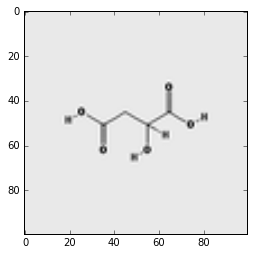

In [28]:
image2 = data[0]
image2 = image2.reshape(100,100)
plt.imshow(image2, cmap='gray')
plt.show

In [31]:
# np.savetxt('batch_1_10000_norm.csv', data, delimiter=',')

#### Due to the low number of actives, we will apply these transformations to a supplemental dataset which contains additional active compounds

#### 2.1 Import and read the data 

In [24]:
supp_actives = np.genfromtxt("2to5actives.csv", delimiter=',') #actives from image batches 2 to 5 

In [26]:
print("the shape of our data: " + str(supp_actives.shape))
print(str(supp_actives[0]))
print("the max value of our data: " + str(np.amax(supp_actives)))
print("the min value of our data: " + str(np.amin(supp_actives)))

the shape of our data: (128, 10000)
[ 245.  245.  245. ...,  245.  245.  245.]
the max value of our data: 255.0
the min value of our data: 56.0


#### 2.2 Visualize the data 

<function matplotlib.pyplot.show>

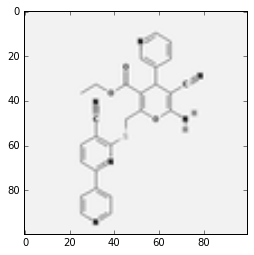

In [29]:
image3 = supp_actives[0]
image3 = image3.reshape(100,100)
plt.imshow(image3, cmap='gray')
plt.show

#### 2.3 Apply transformation

In [30]:
Scaletoarray(supp_actives)

done!


In [31]:
print("the shape of our data: " + str(supp_actives.shape))
print(str(supp_actives[0]))
print("the max value of our data: " + str(np.amax(supp_actives)))
print("the min value of our data: " + str(np.amin(supp_actives)))

the shape of our data: (128, 10000)
[ 0.94708991  0.94708991  0.94708991 ...,  0.94708991  0.94708991
  0.94708991]
the max value of our data: 1.0
the min value of our data: 0.0


#### 2.4 Visualize again

<function matplotlib.pyplot.show>

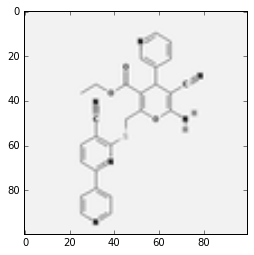

In [47]:
image4 = supp_actives[0]
image4 = image4.reshape(100,100)
plt.imshow(image4, cmap='gray')
plt.show

In [48]:
np.savetxt('2to5actives_norm.csv', supp_actives, delimiter=',')

### Now we will combine the two datasets 

In [40]:
extended_batch_1 = np.append(data, supp_actives, axis=0)

In [41]:
print("the shape of our data: " + str(extended_batch_1.shape))
print(str(extended_batch_1[0]))
print("the max value of our data: " + str(np.amax(extended_batch_1)))
print("the min value of our data: " + str(np.amin(extended_batch_1)))

the shape of our data: (10128, 10000)
[ 0.91379309  0.91379309  0.91379309 ...,  0.91379309  0.91379309
  0.91379309]
the max value of our data: 1.00000011921
the min value of our data: 0.0


In [42]:
Scaletoarray(extended_batch_1) # since the max value seems to have changed

done!


In [43]:
print("the shape of our data: " + str(extended_batch_1.shape))
print(str(extended_batch_1[0]))
print("the max value of our data: " + str(np.amax(extended_batch_1)))
print("the min value of our data: " + str(np.amin(extended_batch_1)))

the shape of our data: (10128, 10000)
[ 0.91379309  0.91379309  0.91379309 ...,  0.91379309  0.91379309
  0.91379309]
the max value of our data: 1.0
the min value of our data: 0.0


<function matplotlib.pyplot.show>

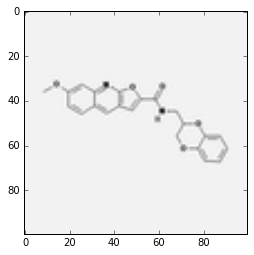

In [46]:
image5 = extended_batch_1[10122]
image5 = image5.reshape(100,100)
plt.imshow(image5, cmap='gray')
plt.show

In [49]:
np.savetxt('extended_batch_1.csv', extended_batch_1, delimiter=',')